# Import Statements 

In [13]:
import pandas as pd 
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Reading Csv Data 

Understanding Data 

In [14]:
data = pd.read_csv('Datasets/Walmart_Store_sales.csv')

In [9]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Collecting the basic information about the data 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Finding the maxvalue at each columns 

In [16]:
data.max()

Store                    45
Date             31-12-2010
Weekly_Sales    3.81869e+06
Holiday_Flag              1
Temperature          100.14
Fuel_Price            4.468
CPI                 227.233
Unemployment         14.313
dtype: object

This Shows the Store with the maximum weekly sales 

In [17]:
data.loc[data['Weekly_Sales'] ==  data['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


# Therefore the Store 14 has the Maximum weekly sales 

# Finding store with maximum std in weeklysales 

In [61]:
maxstd=pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std())
maxstd = maxstd.reset_index()

In [62]:
maxstd.loc[maxstd['Weekly_Sales']==maxstd['Weekly_Sales'].max()]

,Store,Weekly_Sales
13,14,317569.949476


## It can be seen that the store 14 has huge variation in sales 

Find the mean sales of store 14

In [22]:
meandf=pd.DataFrame(data.groupby('Store')['Weekly_Sales'].mean())

In [30]:
meandf=meandf.reset_index()
meandf.loc[meandf['Store'] == 14]

,Store,Weekly_Sales
13,14,2.020978e+06


In [13]:
coff = 2.020978e+06/317569.949476

In [14]:
coff

6.363882991242322

### we see that coff is 6.363882991242322

In [63]:
data['Date'] = pd.to_datetime(data['Date'])

In [64]:
date_from = pd.Timestamp(date(2012,7,1))
date_to = pd.Timestamp(date(2012,9,30))

In [65]:
Q3data=data[(data['Date'] > date_from) & (data['Date'] < date_to)]

In [66]:
inital_Q3 = list(Q3data['Weekly_Sales'].loc[Q3data['Date'] == Q3data['Date'].min()])

In [67]:
end_Q3 = list(Q3data['Weekly_Sales'].loc[Q3data['Date'] == Q3data['Date'].max()])

In [68]:
inital_Q3=np.array(inital_Q3)
end_Q3=np.array(end_Q3)

In [69]:
growth = (end_Q3/inital_Q3)**(1/4) - 1

In [70]:
growth_rate = growth*100

In [71]:
data3=pd.DataFrame(np.column_stack([meandf, growth_rate]),columns=['Store','Avg_Weekly_Sales','Growth_Rate_Q3'])

In [72]:
data3.head()

,Store,Avg_Weekly_Sales,Growth_Rate_Q3
0,1.0,1.555264e+06,-3.566903
1,2.0,1.925751e+06,-2.068632
2,3.0,4.027044e+05,-1.147438
3,4.0,2.094713e+06,-1.167093
4,5.0,3.180118e+05,-3.022293


In [48]:
data3.sort_values('Growth_Rate_Q3',ascending=False).head()

,Store,Avg_Weekly_Sales,Growth_Rate_Q3
43,44.0,3.027489e+05,1.201154
31,32.0,1.166568e+06,0.668373
24,25.0,7.067215e+05,0.437120
20,21.0,7.560691e+05,0.165665
36,37.0,5.189003e+05,0.052868


## From above we can See that store 44 has maximum growth rate  in Q3 of 2012

In [26]:
data['Weekly_Sales'].mean()`

1046964.8775617732

In [73]:
data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [74]:
Christmas1 = pd.Timestamp(date(2010,12,31) )
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )
Christmas4 = pd.Timestamp(date(2013,12,27) )

Thanksgiving1=pd.Timestamp(date(2010,11,26) )
Thanksgiving2=pd.Timestamp(date(2011,11,25) )
Thanksgiving3=pd.Timestamp(date(2012,11,23) )
Thanksgiving4=pd.Timestamp(date(2013,11,29) )

LabourDay1=pd.Timestamp(date(2010,2,10) )
LabourDay2=pd.Timestamp(date(2011,2,9) )
LabourDay3=pd.Timestamp(date(2012,2,7) )
LabourDay4=pd.Timestamp(date(2013,2,6) )

SuperBowl1=pd.Timestamp(date(2010,9,12) )
SuperBowl2=pd.Timestamp(date(2011,9,11) )
SuperBowl3=pd.Timestamp(date(2012,9,10) )
SuperBowl4=pd.Timestamp(date(2013,9,8) )


Christmas_mean_sales=data[(data['Date'] == Christmas1) | (data['Date'] == Christmas2) | (data['Date'] == Christmas3) | (data['Date'] == Christmas4)]
Thanksgiving_mean_sales=data[(data['Date'] == Thanksgiving1) | (data['Date'] == Thanksgiving2) | (data['Date'] == Thanksgiving3) | (data['Date'] == Thanksgiving4)]
LabourDay_mean_sales=data[(data['Date'] == LabourDay1) | (data['Date'] == LabourDay2) | (data['Date'] == LabourDay3) | (data['Date'] == LabourDay4)]
SuperBowl_mean_sales=data[(data['Date'] == SuperBowl1) | (data['Date'] == SuperBowl2) | (data['Date'] == SuperBowl3) | (data['Date'] == SuperBowl4)]

In [75]:
print(round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2))

960833.11 1471273.43 1008369.41 nan


In [30]:
sorted([960833.11,1471273.43,1008369.41,1041256.0],reverse=True)

[1471273.43, 1041256.0, 1008369.41, 960833.11]

### We can notice Thanksgiving_mean_sales is greater than meansales of Non-holiday week mean

Grouping Data monthly 

In [76]:
monthly = data.groupby(pd.Grouper(key='Date', freq='1M')).sum()# groupby each 1 month


In [88]:
monthly=monthly.reset_index()

Text(0,0.5,'Weekly_Sales')

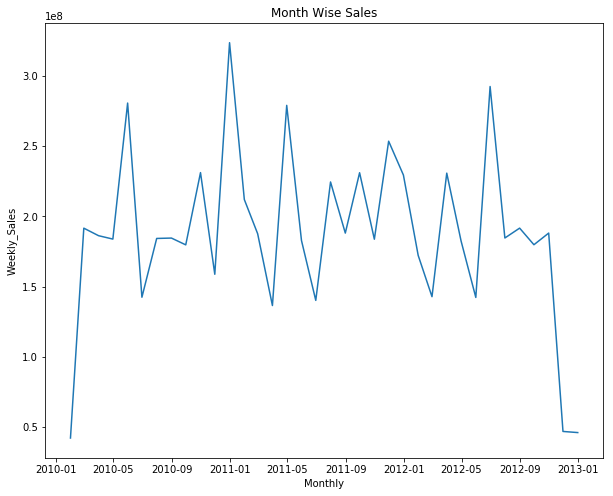

In [90]:
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

#### We can observe from the Graph that highest sum of sales is recorded in between jan-2011 to march-2011

In [92]:
Quaterly = data.groupby(pd.Grouper(key='Date', freq='3M')).sum()

In [93]:
Quaterly = Quaterly.reset_index()

Text(0,0.5,'Weekly_Sales')

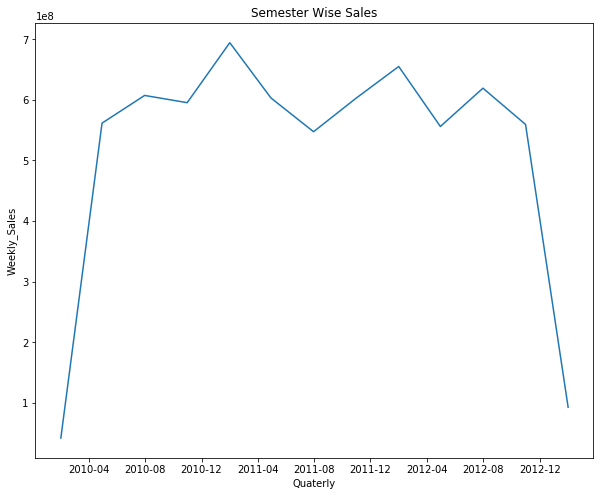

In [96]:
fig, ax = plt.subplots(figsize=(10,8))
X = Quaterly['Date']
Y = Quaterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Quaterly')
plt.ylabel('Weekly_Sales')


#### We can observe from the Graph that higest sum of sales is recorded in Q1 of 2011 and 2012

In [97]:
Store1 = pd.DataFrame(data.loc[data['Store'] == 1])

In [98]:
Store1.sort_values('Date',inplace=True)
Store1['days'] = Store1['Date'].dt.day


In [99]:
Store1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,days
34,1,2010-01-10,1453329.50,0,71.89,2.603,211.671989,7.838,10
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,4
21,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787,7
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26


Finding the correlation b/w variables


In [100]:
Store1.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,days
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,NaN,1.000000,0.194905,-0.222701,0.124592,0.225408,-0.097955,-0.280272
Holiday_Flag,NaN,0.194905,1.000000,-0.200543,-0.085903,-0.028919,0.082949,-0.036036
Temperature,NaN,-0.222701,-0.200543,1.000000,0.228493,0.118503,-0.180695,0.118512
Fuel_Price,NaN,0.124592,-0.085903,0.228493,1.000000,0.755259,-0.513944,0.027158
CPI,NaN,0.225408,-0.028919,0.118503,0.755259,1.000000,-0.813471,0.047121
Unemployment,NaN,-0.097955,0.082949,-0.180695,-0.513944,-0.813471,1.000000,-0.018190
days,NaN,-0.280272,-0.036036,0.118512,0.027158,0.047121,-0.018190,1.000000


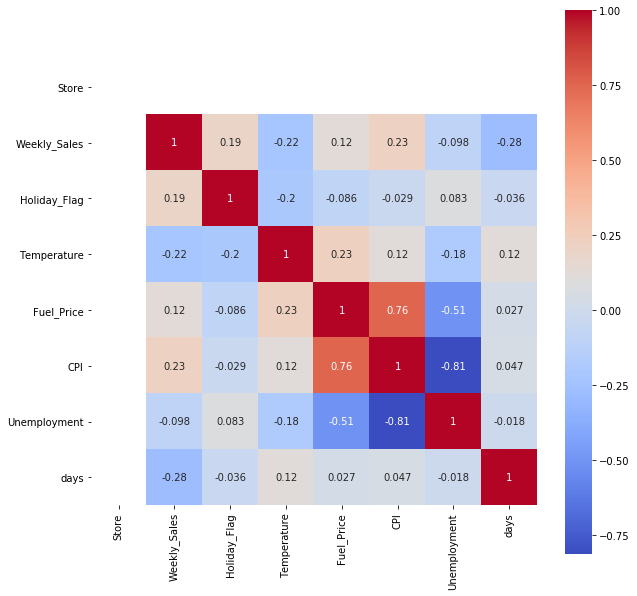

In [44]:
corr=Store1.corr()
plt.figure(figsize=(10,10))
sb.heatmap(corr, square = True, cmap='coolwarm',annot=corr)

From Above we can see Temperature and Unemployment Has Negativve impact on sales where as the Fuel price and Cpi have positive impact on sales


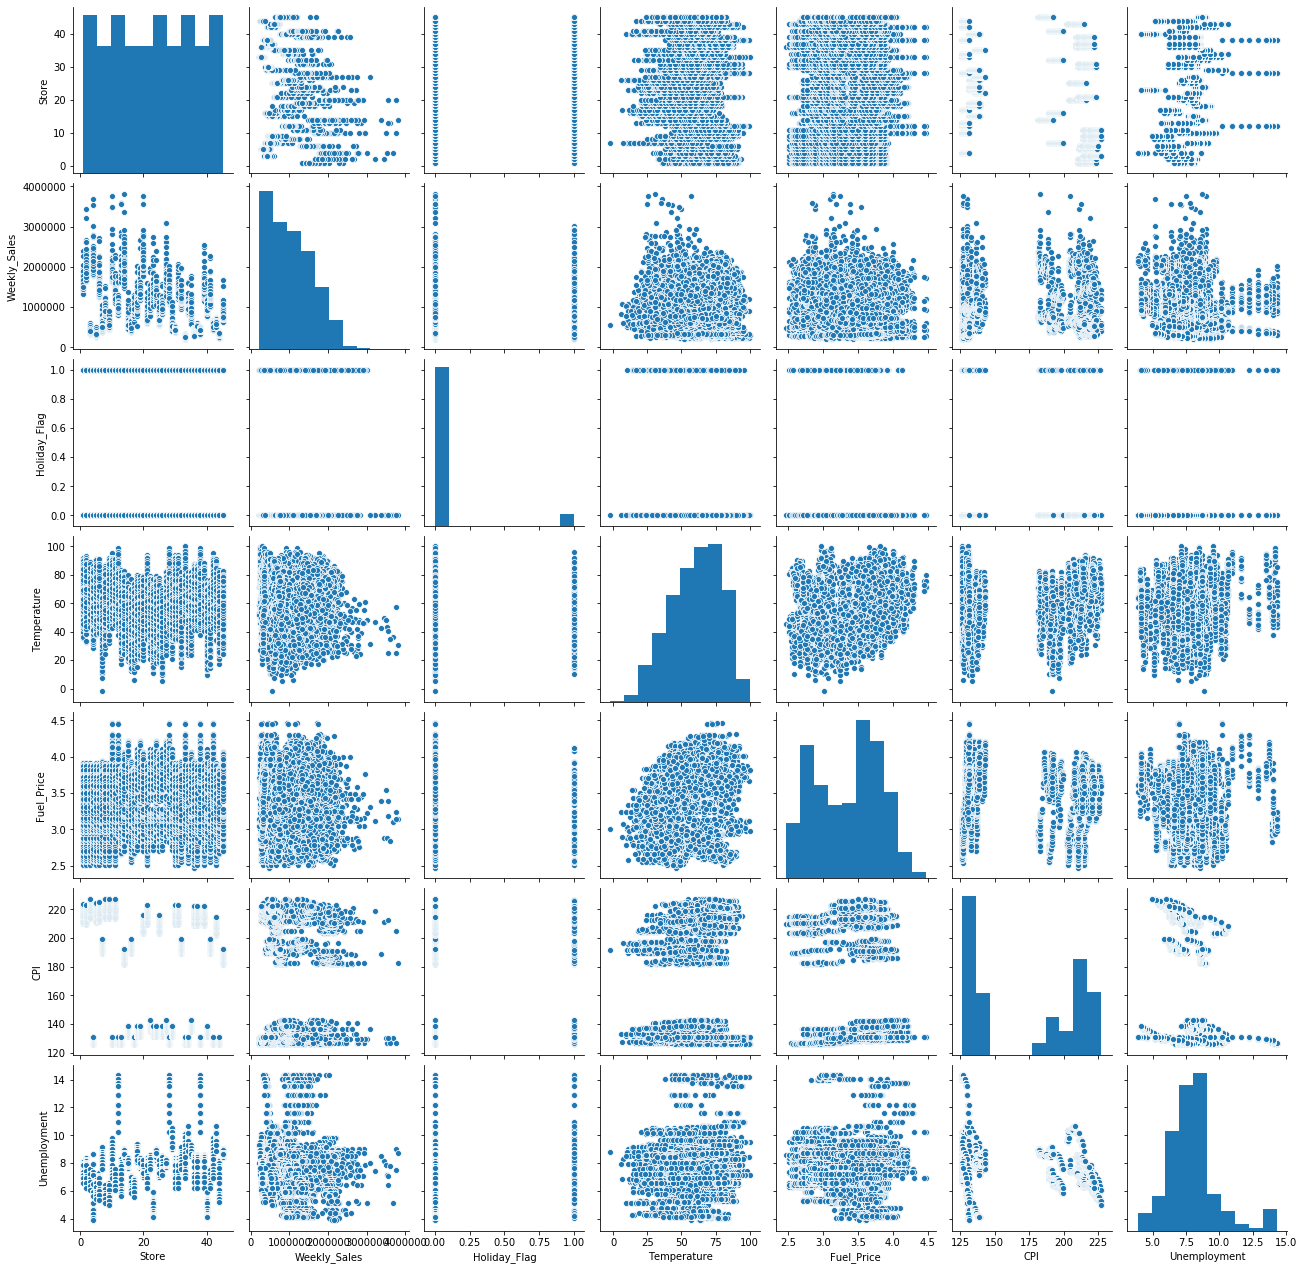

In [45]:
sb.pairplot(data)

Checking out distubution of sales of Store1


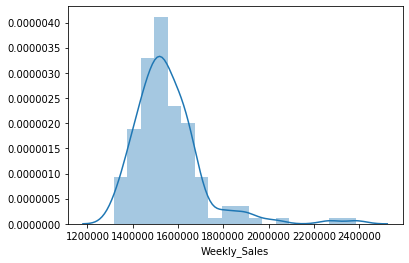

In [46]:
sb.distplot(Store1['Weekly_Sales'])

We see that data is Right Skewed 

Now creating the linear regression model

understanding linerity b/w the variables

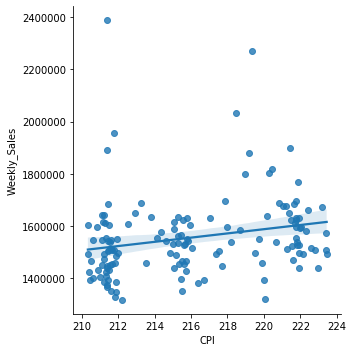

In [47]:
sb.lmplot(x="CPI",y="Weekly_Sales" ,data=Store1)

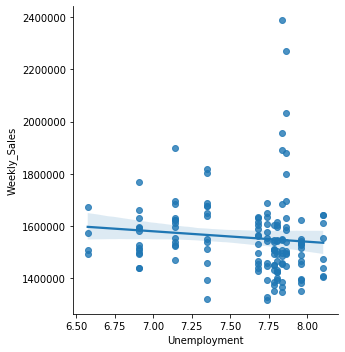

In [48]:
sb.lmplot(x="Unemployment",y="Weekly_Sales" ,data=Store1)

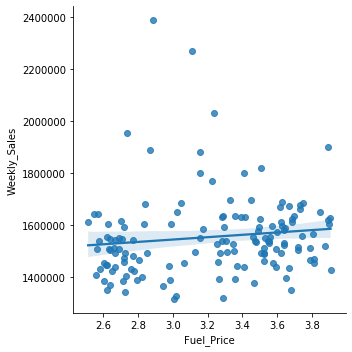

In [49]:
sb.lmplot(x="Fuel_Price",y="Weekly_Sales" ,data=Store1)

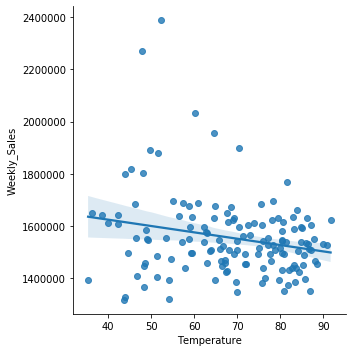

In [50]:
sb.lmplot(x="Temperature",y="Weekly_Sales" ,data=Store1)

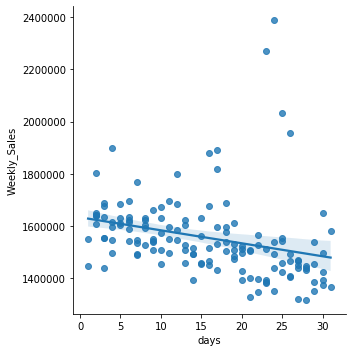

In [51]:
sb.lmplot(x="days",y="Weekly_Sales" ,data=Store1)

Training the linear model 

In [52]:
X= Store1[['CPI','Unemployment','Fuel_Price','Temperature','days']]
y=Store1['Weekly_Sales']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
y_train.head()

127    1527014.04
32     1430378.67
114    1621031.70
20     1422711.60
13     1603955.12
Name: Weekly_Sales, dtype: float64

In [114]:
y_pred = lm.predict(X_test)

In [115]:
y_pred

array([1438108.59708958, 1474415.59928413, 1593690.22835636,
       1476103.46844882, 1613460.27862513, 1550936.84466404,
       1684274.89449114, 1471217.66269098, 1598221.51111772,
       1612815.73310109, 1631836.31370458, 1475614.26636831,
       1512795.46891147, 1402226.76739249, 1563973.78109128,
       1633670.06098929, 1578434.42769211, 1471860.88331432,
       1575088.3521784 , 1690654.05302417, 1560252.95473628,
       1617432.24288407, 1527814.12203598, 1514242.75438448,
       1538637.47769961, 1530244.26669668, 1624315.17850578,
       1505082.64416111, 1671967.32263883])

In [116]:
print(lm.intercept_)

-3060293.386430793


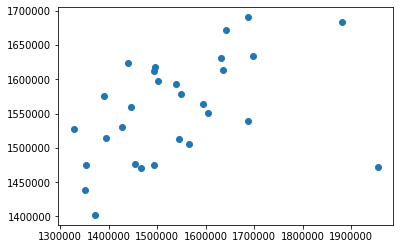

In [117]:
plt.scatter(y_test,y_pred)

In [121]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 94328.91847057971
MSE: 17969721005.527985
RMSE: 134051.18800491097


In [131]:
linear_accuarcy = round(lm.score(X_train,y_train)*100,2)

In [132]:
linear_accuarcy

20.4

We See that the accuarcy of linear model is 20.4%

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rfr = RandomForestRegressor()

In [127]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [128]:
y_pred = rfr.predict(X_test)

In [129]:
y_pred

array([1439795.0857, 1458754.9926, 1600459.602 , 1486976.6871,
       1565460.0957, 1584580.5856, 1672302.3351, 1460814.9837,
       1515407.3153, 1560686.6493, 1587457.5149, 1547596.4064,
       1535123.2911, 1427990.7842, 1564789.1541, 1630809.4352,
       1539051.329 , 1399721.4406, 1634715.0451, 1661132.8546,
       1488491.7501, 1579883.6657, 1575012.167 , 1470875.2703,
       1593360.5324, 1523216.7266, 1553350.888 , 1461513.9635,
       1610860.8577])

In [130]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 91716.66973103458
MSE: 19956996947.881393
RMSE: 141269.23567387697


In [135]:
RandomForest_accuarcy = round(rfr.score(X_train,y_train)*100,2)

In [136]:
RandomForest_accuarcy

87.09

By using Random_forest regression model we can obtain Accuarcy of 87.09%

In [138]:
from sklearn.tree import DecisionTreeRegressor

In [139]:
dtr = DecisionTreeRegressor()

In [140]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [141]:
y_pred = dtr.predict(X_test)

In [142]:
y_pred

array([1385065.2 , 1396926.82, 2033320.66, 1540421.49, 1614259.35,
       1559889.  , 1459601.17, 1439123.71, 1380020.27, 1517428.87,
       1594938.89, 1682614.26, 1492418.14, 1449142.92, 1545418.53,
       1631135.79, 1540471.24, 1384209.22, 1799682.38, 1675431.16,
       1380020.27, 1614259.35, 1316899.31, 1649604.63, 2033320.66,
       1521577.87, 1542561.09, 1527845.81, 1643690.9 ])

In [145]:
DecisionTree_accuarcy = round(dtr.score(X_train,y_train)*100,2)

In [146]:
DecisionTree_accuarcy

100.0

By using DecisionTree regression model we can obtain Accuarcy of 100%

comparing the Accuarcies of models

In [152]:
Accuarcy = pd.DataFrame({'Linear_regression':linear_accuarcy ,'RandomForest' : RandomForest_accuarcy , 'DecisionTree':DecisionTree_accuarcy},index=["Accuarcy"])

In [153]:
Accuarcy

,Linear_regression,RandomForest,DecisionTree
Accuarcy,20.4,87.09,100.0
